In [1]:
import re

import torch

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import make_grid
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
im = plt.imread('./data/ModesLP_temp_20.62C/ModeLP-input_0deg-1527.0nm-output_0deg.tiff')
im.shape

(127, 127)

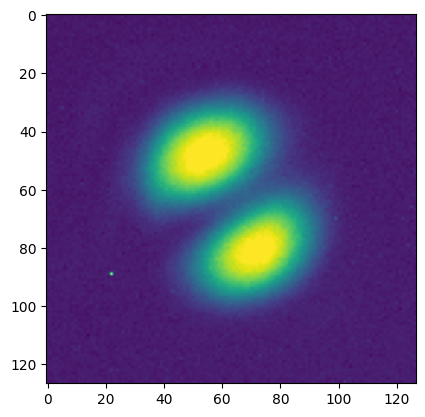

In [3]:
plt.imshow(im)

In [4]:
all_tabs = pd.read_excel('modal_decomposition_labels2.xlsx', sheet_name=None)
type(all_tabs)

dict

In [5]:
concatenated_df = pd.concat([df.assign(sheet_name=name) for name, df in all_tabs.items()], ignore_index=True)


In [6]:
print(concatenated_df.shape)
concatenated_df.head()

(49736, 8)


,Label,modal weight LP_01,phase angle LP_01,modal weight LP_11a,phase angle LP_11a,modal weight LP_11b,phase angle LP_11b,sheet_name
0,ModeLP-input_0deg-1527.0nm-output_0deg.tiff,0.637,0,0.678,1.544,0.366,-1.610,ModesLP_temp_20.62C
1,ModeLP-input_0deg-1527.0nm-output_100deg.tiff,0.920,0,0.018,-0.940,0.390,1.567,ModesLP_temp_20.62C
2,ModeLP-input_0deg-1527.0nm-output_101deg.tiff,0.923,0,0.385,-1.564,0.000,1.759,ModesLP_temp_20.62C
3,ModeLP-input_0deg-1527.0nm-output_102deg.tiff,0.922,0,0.095,-1.445,0.376,-1.592,ModesLP_temp_20.62C
4,ModeLP-input_0deg-1527.0nm-output_103deg.tiff,0.919,0,0.269,-1.537,0.290,-1.542,ModesLP_temp_20.62C


In [7]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(-1, 1))
# concatenated_df['modal weight LP_01'] = scaler.fit_transform(concatenated_df['modal weight LP_01'].values[:, None])
# concatenated_df['modal weight LP_11a'] = scaler.fit_transform(concatenated_df['modal weight LP_11a'].values[:, None])
# concatenated_df['phase angle LP_11a'] = scaler.fit_transform(concatenated_df['phase angle LP_11a'].values[:, None])
# concatenated_df['modal weight LP_11b'] = scaler.fit_transform(concatenated_df['modal weight LP_11b'].values[:, None])
# concatenated_df['phase angle LP_11b'] = scaler.fit_transform(concatenated_df['phase angle LP_11b'].values[:, None])

In [8]:
concatenated_df.sheet_name.unique()

array(['ModesLP_temp_20.62C', 'ModesLP_temp_35C', 'ModesLP_temp_50C',
       'ModesLP_temp_65C', 'ModesLP_temp_80C'], dtype=object)

In [9]:
concatenated_df.iloc[1,0]

'ModeLP-input_0deg-1527.0nm-output_100deg.tiff'

In [10]:
concatenated_df

,Label,modal weight LP_01,phase angle LP_01,modal weight LP_11a,phase angle LP_11a,modal weight LP_11b,phase angle LP_11b,sheet_name
0,ModeLP-input_0deg-1527.0nm-output_0deg.tiff,0.637,0,0.678,1.544,0.366,-1.610,ModesLP_temp_20.62C
1,ModeLP-input_0deg-1527.0nm-output_100deg.tiff,0.920,0,0.018,-0.940,0.390,1.567,ModesLP_temp_20.62C
2,ModeLP-input_0deg-1527.0nm-output_101deg.tiff,0.923,0,0.385,-1.564,0.000,1.759,ModesLP_temp_20.62C
3,ModeLP-input_0deg-1527.0nm-output_102deg.tiff,0.922,0,0.095,-1.445,0.376,-1.592,ModesLP_temp_20.62C
4,ModeLP-input_0deg-1527.0nm-output_103deg.tiff,0.919,0,0.269,-1.537,0.290,-1.542,ModesLP_temp_20.62C
...,...,...,...,...,...,...,...,...
49731,ModeLP-input_90deg-1566.0nm-output_96deg.tiff,0.897,0,0.429,1.594,0.101,1.634,ModesLP_temp_80C
49732,ModeLP-input_90deg-1566.0nm-output_97deg.tiff,0.906,0,0.422,1.621,0.014,-2.489,ModesLP_temp_80C
49733,ModeLP-input_90deg-1566.0nm-output_98deg.tiff,0.906,0,0.415,-1.579,0.079,-1.539,ModesLP_temp_80C
49734,ModeLP-input_90deg-1566.0nm-output_99deg.tiff,0.908,0,0.418,1.591,0.001,-2.583,ModesLP_temp_80C


In [11]:
# Function to get the number of rows and columns of an image
def get_image_size(row):
    image_path = 'data/' + row['sheet_name'] + '/' + row['Label']
    image = Image.open(image_path)
    return image.size[1], image.size[0]  # Rows, Columns

concatenated_df['num_rows'], concatenated_df['num_cols'] = zip(*concatenated_df.apply(get_image_size, axis=1))
print(concatenated_df.head())

                                           Label  modal weight LP_01  \
0    ModeLP-input_0deg-1527.0nm-output_0deg.tiff               0.637   
1  ModeLP-input_0deg-1527.0nm-output_100deg.tiff               0.920   
2  ModeLP-input_0deg-1527.0nm-output_101deg.tiff               0.923   
3  ModeLP-input_0deg-1527.0nm-output_102deg.tiff               0.922   
4  ModeLP-input_0deg-1527.0nm-output_103deg.tiff               0.919   

   phase angle LP_01  modal weight LP_11a  phase angle LP_11a  \
0                  0                0.678               1.544   
1                  0                0.018              -0.940   
2                  0                0.385              -1.564   
3                  0                0.095              -1.445   
4                  0                0.269              -1.537   

   modal weight LP_11b  phase angle LP_11b           sheet_name  num_rows  \
0                0.366              -1.610  ModesLP_temp_20.62C       127   
1                0.390

In [12]:
# Regular expression patterns to extract the desired substrings
temp_pattern = r"ModesLP_temp_(20.62|35|50|65|80)C"
input_pattern = r"ModeLP-input_(\d{1,3})deg-(\d+\.\d+)nm-output_(\d{1,4})deg\.tiff"

# Function to extract the substrings and add them as new columns to the DataFrame
def extract_and_add_columns(row):
    temp_match = re.match(temp_pattern, row['sheet_name'])
    input_match = re.match(input_pattern, row['Label'])
    row['Temp'] = temp_match.group(1)
    row['deg_input'] = input_match.group(1)
    row['wavelength'] = input_match.group(2)
    row['analyzer_angle'] = input_match.group(3)
    return row

In [13]:
concatenated_df = concatenated_df.apply(extract_and_add_columns, axis=1)

In [14]:
concatenated_df.head()

,Label,modal weight LP_01,phase angle LP_01,modal weight LP_11a,phase angle LP_11a,modal weight LP_11b,phase angle LP_11b,sheet_name,num_rows,num_cols,Temp,deg_input,wavelength,analyzer_angle
0,ModeLP-input_0deg-1527.0nm-output_0deg.tiff,0.637,0,0.678,1.544,0.366,-1.610,ModesLP_temp_20.62C,127,127,20.62,0,1527.0,0
1,ModeLP-input_0deg-1527.0nm-output_100deg.tiff,0.920,0,0.018,-0.940,0.390,1.567,ModesLP_temp_20.62C,127,127,20.62,0,1527.0,100
2,ModeLP-input_0deg-1527.0nm-output_101deg.tiff,0.923,0,0.385,-1.564,0.000,1.759,ModesLP_temp_20.62C,127,127,20.62,0,1527.0,101
3,ModeLP-input_0deg-1527.0nm-output_102deg.tiff,0.922,0,0.095,-1.445,0.376,-1.592,ModesLP_temp_20.62C,127,127,20.62,0,1527.0,102
4,ModeLP-input_0deg-1527.0nm-output_103deg.tiff,0.919,0,0.269,-1.537,0.290,-1.542,ModesLP_temp_20.62C,127,127,20.62,0,1527.0,103


In [15]:
print(concatenated_df.Temp.isna().sum())
print(concatenated_df.deg_input.isna().sum())
print(concatenated_df.wavelength.isna().sum())
print(concatenated_df.analyzer_angle.isna().sum())

0
0
0
0


In [16]:
concatenated_df.iloc[0,-4:].values.astype(float)

array([  20.62,    0.  , 1527.  ,    0.  ])

In [17]:
concatenated_df.num_rows.value_counts()

num_rows
127    49169
126       98
125       84
122       53
124       52
123       44
121       44
120       29
114       29
119       24
115       20
118       20
116       19
117       18
112        8
111        8
110        6
113        5
109        4
108        2
Name: count, dtype: int64

In [18]:
class ModalDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        col_index = self.dataframe.columns.get_loc('sheet_name')
        folder_name = self.dataframe.iloc[idx, col_index]
        file_name = self.dataframe.iloc[idx, 0]
        image_path = f"{self.root_dir}/{folder_name}/{file_name}"

        image = Image.open(image_path)#.convert('RGB')

        if self.transform:
            image = self.transform(image)

        self.dataframe.iloc[idx,4] = (np.cos(self.dataframe.iloc[idx,4]) + 1)/2
        self.dataframe.iloc[idx,6] = (np.cos(self.dataframe.iloc[idx,6]) + 1)/2

        return image, self.dataframe.iloc[idx,[1,3,4,5,6]].values.astype(float), (float(self.dataframe.iloc[idx,-4])-20.62)/(80 - 20.62), float(self.dataframe.iloc[idx,-2])

In [19]:
concatenated_df.Temp.unique()

array(['20.62', '35', '50', '65', '80'], dtype=object)

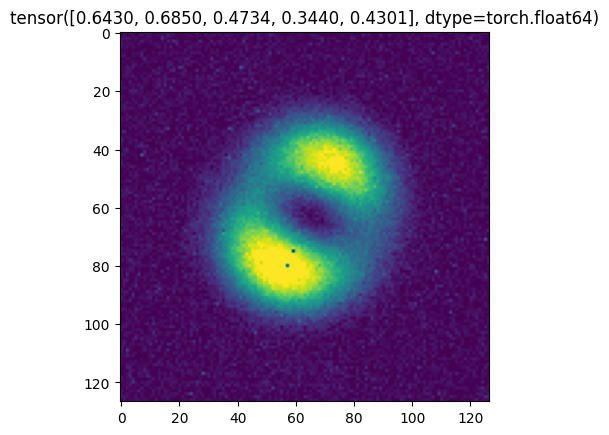

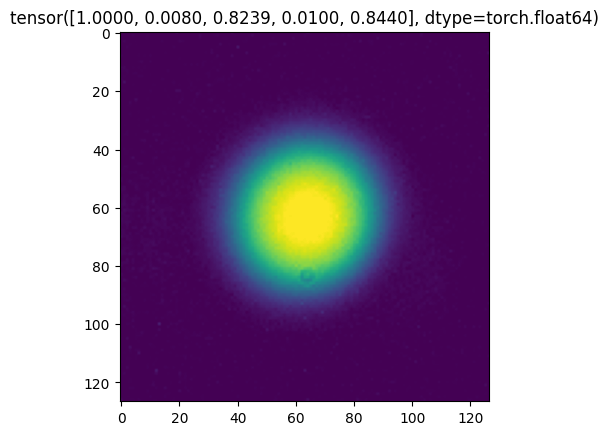

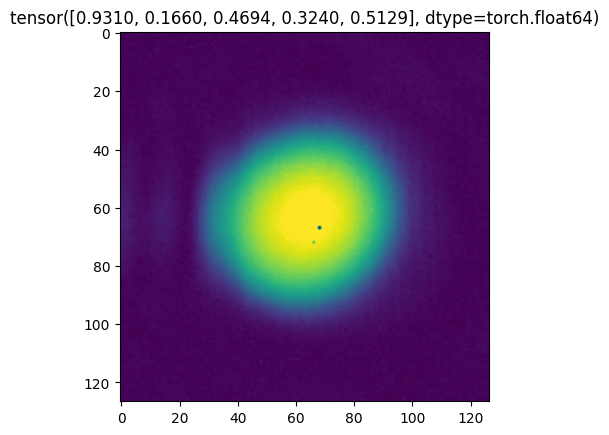

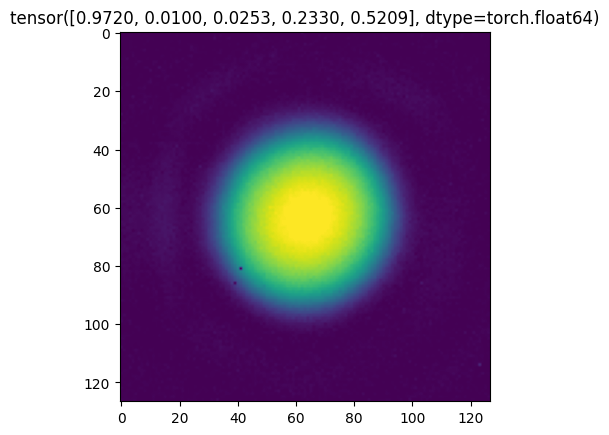

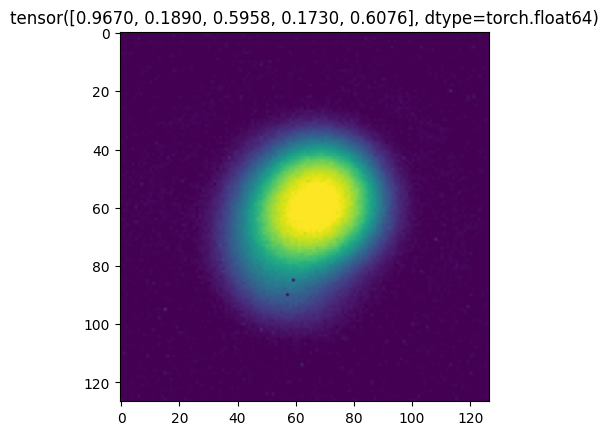

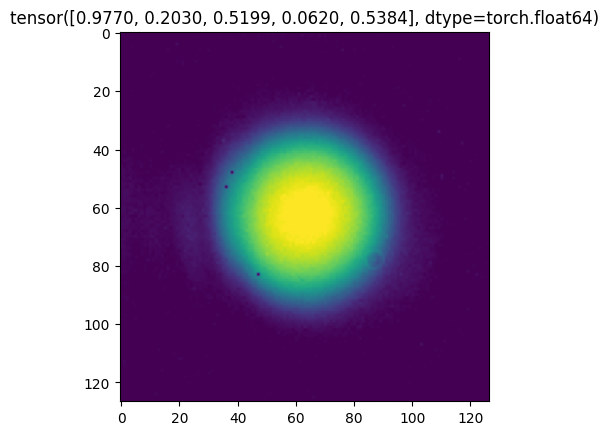

In [20]:
transform = transforms.Compose([
    transforms.Resize((127, 127)),
    transforms.ToTensor(),
])

dataset = ModalDataset(dataframe=concatenated_df, root_dir='./data', transform=transform)
train_set, val_set, test_set = torch.utils.data.random_split(dataset, [0.7, 0.15, 0.15])


batch_size = 64 
train_dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_set, batch_size=batch_size)
test_dataloader = DataLoader(test_set, batch_size=batch_size)

for batch_idx, batch in enumerate(train_dataloader):
    imgs = batch[0]
    labels = batch[1]
    T = batch[2]
    plt.imshow(imgs[0].squeeze())
    plt.title(labels[0])
    plt.show()
    if batch_idx == 5:
        break

In [21]:
batch[1].shape

torch.Size([64, 5])

In [22]:
denormalized_images = make_grid(batch[0]).cpu().numpy()
denormalized_images.shape

(3, 1034, 1034)

In [23]:
batch[0].shape

torch.Size([64, 1, 127, 127])

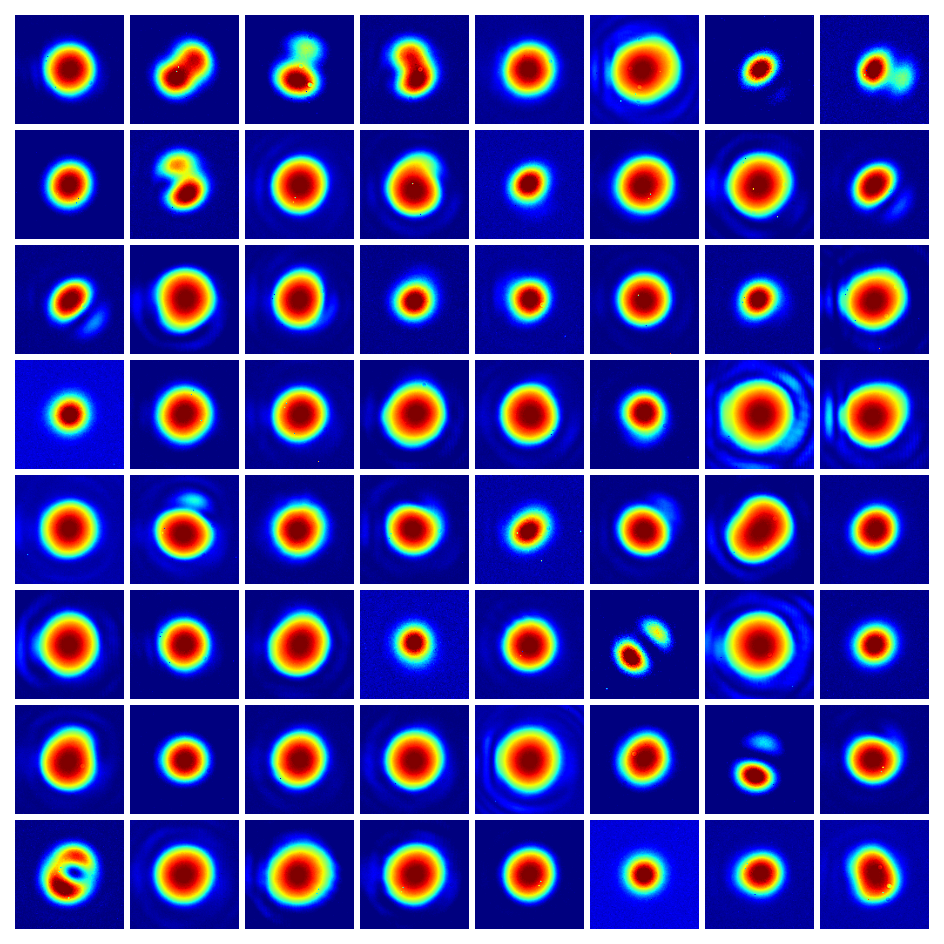

In [24]:
def denormalize(tensor):
    mean = [0.5, 0.5]
    std = [0.5, 0.5]
    tensor = tensor * std + mean
    return tensor

denormalized_images = make_grid(batch[0], padding=5, pad_value=torch.nan).cpu().numpy()
#denormalized_images = denormalize(denormalized_images)

# Plot the batch of images
plt.figure(figsize=(12, 12))
plt.imshow(denormalized_images.mean(0), cmap='jet')
plt.axis("off")
plt.show()

## Modelos de DL

In [25]:
import timm
from torchinfo import summary
import torch.nn.functional as F

In [26]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda:0


In [27]:
print('models: ', timm.list_models('*mobilenetv2*'))

models:  ['mobilenetv2_035', 'mobilenetv2_050', 'mobilenetv2_075', 'mobilenetv2_100', 'mobilenetv2_110d', 'mobilenetv2_120d', 'mobilenetv2_140']


In [51]:
# model_b = timm.create_model('mobilenetv2_100', pretrained = True, num_classes = 0, in_chans=1)
model_b = timm.create_model('mobilenetv3_small_075', pretrained = True, num_classes = 0, in_chans=1)
# model_b = timm.create_model('xception41', pretrained = True, num_classes = 0, in_chans=1)
# model_b = timm.create_model('resnet50', pretrained = True, num_classes = 0, in_chans=1)
# model_b = timm.create_model('vgg16', pretrained = True, num_classes = 0, in_chans=1)

#Congelar modelo base
for param in model_b.parameters():
    param.requires_grad = False

model_b.to(DEVICE)
model_b.train()

MobileNetV3(
  (conv_stem): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): Hardswish()
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
        (bn1): BatchNormAct2d(
          16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): ReLU(inplace=True)
          (conv_expand): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (gate): Hardsigmoid()
        )
        (conv_pw): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          

In [52]:
class CustomTimmModel(torch.nn.Module):
    def __init__(self, backbone, num_classes=10):
        super(CustomTimmModel, self).__init__()
        
        # Use the passed backbone model
        self.backbone = backbone
        
        # Get the feature dimension
        # This might require inspection of the specific model
        feature_dim = self.backbone.num_features
        
        # Custom head with additional feature integration
        self.custom_head = torch.nn.Sequential(
            torch.nn.Linear(feature_dim, 256),  # +1 for the additional feature
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256, 32),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
        )

        self.custom_head_out = torch.nn.Sequential(
            torch.nn.Linear(32+1, num_classes),
            torch.nn.Sigmoid()
        )
    
    def forward(self, x, additional_feature):
        # Extract features from the backbone
        backbone_features = self.backbone(x)
        backbone_features = self.custom_head(backbone_features)
        
        # Flatten the backbone features
        backbone_features = backbone_features.view(backbone_features.size(0), -1)
        
        # Concatenate the additional feature
        combined_features = torch.cat([backbone_features, additional_feature], dim=1)
        
        # Pass through the custom head
        output = self.custom_head_out(combined_features)
        
        return output

In [53]:
# Create the custom model by passing the existing model
model = CustomTimmModel(
    backbone=model_b, 
    num_classes=5
)
model.to(DEVICE)

CustomTimmModel(
  (backbone): MobileNetV3(
    (conv_stem): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): Hardswish()
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (bn1): BatchNormAct2d(
            16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): ReLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): ReLU(inplace=True)
            (conv_expand): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (gate): Hardsigmoid()
          )
          (conv_pw): Conv2d(16, 16, kernel_size=(

In [54]:
def compute_loss(net, data_loader):
    curr_loss = 0.
    with torch.no_grad():
        for cnt, (features, targets, temps,_) in enumerate(data_loader):
            features = features.to(DEVICE)
            targets = targets.to(DEVICE)
            temps = temps.float().unsqueeze(1).to(DEVICE)
            logits = net(features,temps).to(DEVICE)
            loss = F.mse_loss(logits.to(DEVICE), targets.type(torch.LongTensor).to(DEVICE))
            curr_loss += loss
        return float(curr_loss)/(cnt*batch_size)

In [55]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
NUM_EPOCHS = 2
# loss_function = torch.nn.L1Loss()
loss_function = torch.nn.MSELoss()

minibatch_cost = []
epoch_cost = []
for epoch in range(NUM_EPOCHS):
    for batch_idx, batch in enumerate(train_dataloader):
        inputs, targets, temps, _ = batch
        inputs = inputs.to(DEVICE)
        targets = targets.to(DEVICE)
        temps = temps.to(DEVICE).float().unsqueeze(1)

        outputs = model(inputs, temps)
        loss = loss_function(outputs.float().to(DEVICE), targets.float().to(DEVICE))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        ### LOGGING
        minibatch_cost.append(loss.item())
        if not batch_idx % 50:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | Batch {batch_idx:03d}/{len(train_dataloader):03d} | Cost: {loss.item():.4f}')
        
    cost = compute_loss(model, val_dataloader)
    epoch_cost.append(cost)
    print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} Val Cost: {cost:.4f}')


Epoch: 001/002 | Batch 000/544 | Cost: 0.1107
Epoch: 001/002 | Batch 050/544 | Cost: 0.0203
Epoch: 001/002 | Batch 100/544 | Cost: 0.0129
Epoch: 001/002 | Batch 150/544 | Cost: 0.0103
Epoch: 001/002 | Batch 200/544 | Cost: 0.0163
Epoch: 001/002 | Batch 250/544 | Cost: 0.0079
Epoch: 001/002 | Batch 300/544 | Cost: 0.0103
Epoch: 001/002 | Batch 350/544 | Cost: 0.0081
Epoch: 001/002 | Batch 400/544 | Cost: 0.0138
Epoch: 001/002 | Batch 450/544 | Cost: 0.0116
Epoch: 001/002 | Batch 500/544 | Cost: 0.0071
Epoch: 001/002 Val Cost: 0.0072
Epoch: 002/002 | Batch 000/544 | Cost: 0.0102
Epoch: 002/002 | Batch 050/544 | Cost: 0.0124
Epoch: 002/002 | Batch 100/544 | Cost: 0.0085
Epoch: 002/002 | Batch 150/544 | Cost: 0.0114
Epoch: 002/002 | Batch 200/544 | Cost: 0.0112
Epoch: 002/002 | Batch 250/544 | Cost: 0.0096
Epoch: 002/002 | Batch 300/544 | Cost: 0.0113
Epoch: 002/002 | Batch 350/544 | Cost: 0.0102
Epoch: 002/002 | Batch 400/544 | Cost: 0.0100
Epoch: 002/002 | Batch 450/544 | Cost: 0.0098
Ep

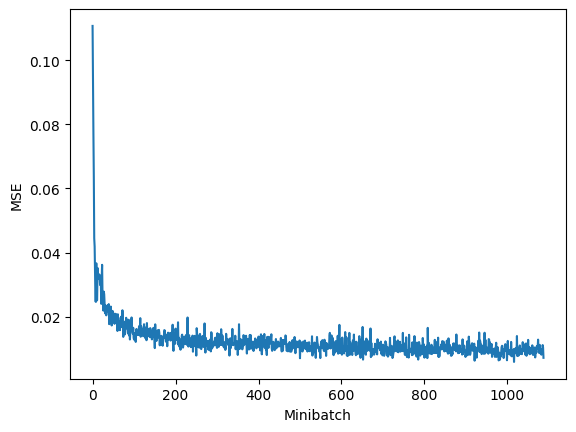

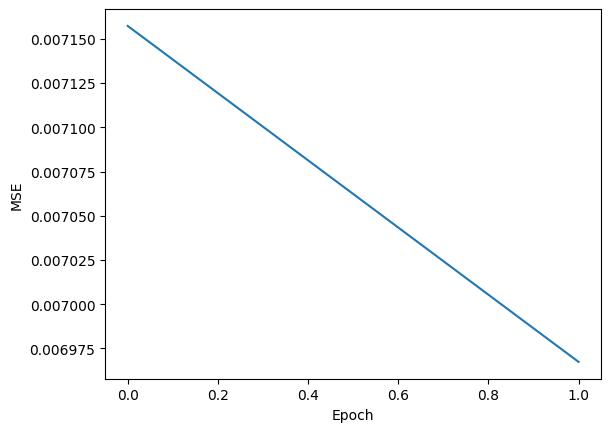

In [56]:
plt.plot(range(len(minibatch_cost)), minibatch_cost)
plt.ylabel('MSE')
plt.xlabel('Minibatch')
plt.show()

plt.plot(range(len(epoch_cost)), epoch_cost)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [57]:
def compute_accuracy(net, data_loader):
    correct_pred, num_examples = 0, 0
    with torch.no_grad():
        for features, targets, temps, _ in data_loader:
            features = features.to(DEVICE)
            targets = targets.to(DEVICE)
            temps = temps.to(DEVICE).float().unsqueeze(1)
            logits = net.forward(features, temps)
            num_examples += targets.size(0)
            correct_pred += torch.square(logits-targets).sum()
        return correct_pred.float()/num_examples
    
print('Training Accuracy: %.2f' % compute_accuracy(model, train_dataloader))
print('Val Accuracy: %.2f' % compute_accuracy(model, val_dataloader))
print('Test Accuracy: %.2f' % compute_accuracy(model, test_dataloader))

Training Accuracy: 0.05
Val Accuracy: 0.05
Test Accuracy: 0.07


In [58]:
import gc

torch.cuda.empty_cache()
gc.collect()

0

In [59]:
# idx = 2
# loss_function(outputs[:,idx].float(), targets[:,idx].float()) 

In [60]:
model.eval()
for batch_idx, batch in enumerate(test_dataloader):
    inputs, targets, temps, wl = batch
    inputs = inputs.to(DEVICE)
    targets = targets.to(DEVICE)
    temps = temps.to(DEVICE).float().unsqueeze(1)

    ret = model(inputs, temps).cpu().detach().numpy()
    break

# ret = model(inputs,temps).cpu().detach().numpy()
ret.shape

(64, 5)

In [61]:
targets = targets.cpu().detach().numpy()

In [62]:
ret

array([[0.96644866, 0.20713586, 0.8253739 , 0.18827885, 0.8276321 ],
       [0.8565649 , 0.34614754, 0.82674414, 0.22829024, 0.8244661 ],
       [0.99991643, 0.00993685, 0.85470134, 0.0067576 , 0.86120874],
       [0.88376385, 0.27281216, 0.80087584, 0.34668055, 0.799914  ],
       [0.9758261 , 0.14386947, 0.8562263 , 0.17609516, 0.8580558 ],
       [0.9156538 , 0.1990079 , 0.813078  , 0.34853312, 0.8118002 ],
       [0.91089463, 0.2785986 , 0.82898206, 0.23535442, 0.8292362 ],
       [0.93980074, 0.20740573, 0.82397765, 0.22989696, 0.8228727 ],
       [0.90228194, 0.32033217, 0.8332785 , 0.20352566, 0.83266824],
       [0.9472806 , 0.24385862, 0.8262574 , 0.20240591, 0.82737625],
       [0.99479574, 0.10511785, 0.8623501 , 0.05486111, 0.8659405 ],
       [0.9034625 , 0.26175278, 0.82829815, 0.27577117, 0.8272548 ],
       [0.96968406, 0.20269991, 0.84787154, 0.13559483, 0.8494251 ],
       [0.9146449 , 0.25399402, 0.82580376, 0.22429894, 0.82351935],
       [0.9920075 , 0.10532965, 0.

In [63]:
targets

array([[0.988     , 0.021     , 0.84615299, 0.15      , 0.84914609],
       [0.876     , 0.357     , 0.85040256, 0.325     , 0.84939633],
       [1.        , 0.01      , 0.85890272, 0.017     , 0.83451092],
       [0.885     , 0.331     , 0.8497839 , 0.327     , 0.8494141 ],
       [0.951     , 0.172     , 0.85114727, 0.258     , 0.85109864],
       [0.912     , 0.312     , 0.85045321, 0.264     , 0.85165652],
       [0.739     , 0.567     , 0.84885678, 0.364     , 0.85182755],
       [0.922     , 0.294     , 0.85028382, 0.253     , 0.84995772],
       [0.902     , 0.368     , 0.8503348 , 0.227     , 0.84892943],
       [0.926     , 0.281     , 0.85078727, 0.252     , 0.85045321],
       [0.994     , 0.021     , 0.85814095, 0.109     , 0.84781793],
       [0.861     , 0.336     , 0.84999231, 0.381     , 0.84957337],
       [0.966     , 0.171     , 0.84964378, 0.196     , 0.85063773],
       [0.961     , 0.14      , 0.85279471, 0.24      , 0.84988838],
       [0.972     , 0.167     , 0.

In [74]:
idx = 3

In [75]:
weight_LP01 = ret[idx,0]
phase_LP01 = 0
weight_LP11a = ret[idx,1]
#(np.cos(self.dataframe.iloc[idx,4]) + 1)/2
phase_LP11a = np.arccos(ret[idx,2]*2-1)
weight_LP11b = ret[idx,3]
phase_LP11b = np.arccos(ret[idx,4]*2-1)

In [76]:
import generador

In [77]:
gen = generador.Generador()

In [78]:
wl_ = wl[idx].item()/1000

In [79]:
targets

array([[0.988     , 0.021     , 0.84615299, 0.15      , 0.84914609],
       [0.876     , 0.357     , 0.85040256, 0.325     , 0.84939633],
       [1.        , 0.01      , 0.85890272, 0.017     , 0.83451092],
       [0.885     , 0.331     , 0.8497839 , 0.327     , 0.8494141 ],
       [0.951     , 0.172     , 0.85114727, 0.258     , 0.85109864],
       [0.912     , 0.312     , 0.85045321, 0.264     , 0.85165652],
       [0.739     , 0.567     , 0.84885678, 0.364     , 0.85182755],
       [0.922     , 0.294     , 0.85028382, 0.253     , 0.84995772],
       [0.902     , 0.368     , 0.8503348 , 0.227     , 0.84892943],
       [0.926     , 0.281     , 0.85078727, 0.252     , 0.85045321],
       [0.994     , 0.021     , 0.85814095, 0.109     , 0.84781793],
       [0.861     , 0.336     , 0.84999231, 0.381     , 0.84957337],
       [0.966     , 0.171     , 0.84964378, 0.196     , 0.85063773],
       [0.961     , 0.14      , 0.85279471, 0.24      , 0.84988838],
       [0.972     , 0.167     , 0.

In [80]:
gen.electric_field(wl_)
im = gen.descom_modal(weight_LP01,phase_LP01,weight_LP11a,phase_LP11a,weight_LP11b,phase_LP11b)

2024-12-16 11:56:58,042 - pyMMF.core [DEBUG  ]  Debug mode ON.
2024-12-16 11:56:58,043 - pyMMF.solv [INFO   ]  Finding the propagation constant of step index fiber by numerically solving the dispersion relation.


2024-12-16 11:56:58,118 - pyMMF.solv [INFO   ]  Found 3 modes in 0.07 seconds.
2024-12-16 11:56:58,119 - pyMMF.solv [INFO   ]  Finding analytical LP mode profiles associated to the propagation constants.


Estimated number of modes using the V number = 3


2024-12-16 11:57:00,228 - pyMMF.solv [INFO   ]  Found 3 LP mode profiles in 0.0 minutes.
2024-12-16 11:57:00,229 - pyMMF.core [DEBUG  ]  Mode data stored in memory.


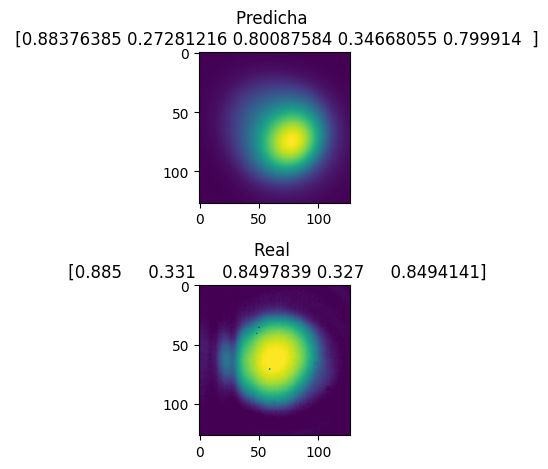

In [81]:
plt.subplot(211)
plt.imshow(im)
plt.title(f'Predicha \n {ret[idx]}')
plt.subplot(212)
plt.imshow(inputs[idx].squeeze().cpu().detach().numpy())
plt.title(f'Real \n {targets[idx]}')
plt.tight_layout()

In [82]:
weight_LP01 = targets[idx,0]
phase_LP01 = 0
weight_LP11a = targets[idx,1]
#(np.cos(self.dataframe.iloc[idx,4]) + 1)/2
phase_LP11a = np.arccos(targets[idx,2]*2-1)
weight_LP11b = targets[idx,3]
phase_LP11b = np.arccos(targets[idx,4]*2-1)
gen.electric_field(wl_)
imReal = gen.descom_modal(weight_LP01,phase_LP01,weight_LP11a,phase_LP11a,weight_LP11b,phase_LP11b)

2024-12-16 11:57:00,602 - pyMMF.core [DEBUG  ]  Debug mode ON.
2024-12-16 11:57:00,603 - pyMMF.solv [INFO   ]  Finding the propagation constant of step index fiber by numerically solving the dispersion relation.
2024-12-16 11:57:00,664 - pyMMF.solv [INFO   ]  Found 3 modes in 0.06 seconds.
2024-12-16 11:57:00,665 - pyMMF.solv [INFO   ]  Finding analytical LP mode profiles associated to the propagation constants.


Estimated number of modes using the V number = 3


2024-12-16 11:57:02,669 - pyMMF.solv [INFO   ]  Found 3 LP mode profiles in 0.0 minutes.
2024-12-16 11:57:02,671 - pyMMF.core [DEBUG  ]  Mode data stored in memory.


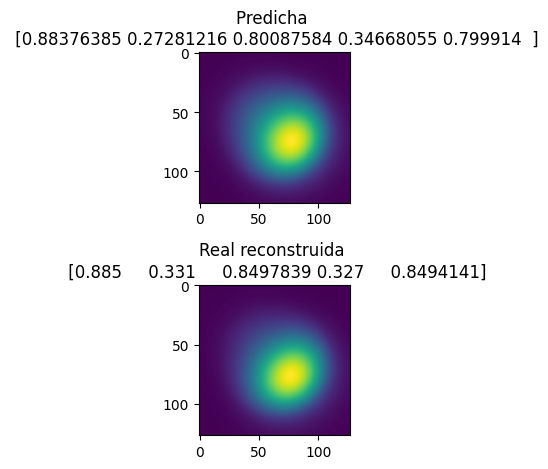

In [83]:
plt.subplot(211)
plt.imshow(im)
plt.title(f'Predicha \n {ret[idx]}')
plt.subplot(212)
plt.imshow(imReal)
plt.title(f'Real reconstruida \n {targets[idx]}')
plt.tight_layout()